# モデルの評価と選択

汎化性能を正しく図るためにはどうすればよいのか→交差検証を行おう！  
train_test_splitを使ってきた。これはランダムにtrainとtestに分割してきた。  
でもこれってたまたま学習しやすい（学習しにくい）データに分割されるかもしれない→偏りが発生する懸念  
じゃぁ交差検証はどうやって行うのか。。。  
１．データセットをk個に分割する  
２．以下をk=1,2...,kについて繰り返す。  
　　A. k番目のデータをテストデータ、残りのk-1個を訓練データとする。  
　　B. k-1個のデータを使って学習を行う。  
　　C. k番目のテストデータを用いて予測の精度を測る。  
こうして得られたk個のスコア（混同行列スコアやR^2など）の平均をそのモデルの予測精度と考えて、モデルの選択を行う。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
x = moons[0]
y = moons[1]

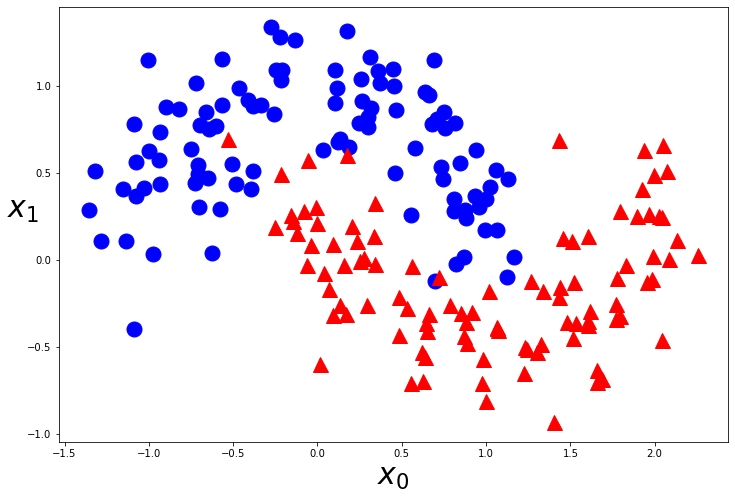

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, x, y, margin=0.3):
    _x1 = np.linspace(x[:,0].min()-margin, x[:,0].max()+margin, 100)
    _x2 = np.linspace(x[:,1].min()-margin, x[:,1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
def plot_datasets(x, y):
    plt.plot(x[:,0][y==0], x[:,1][y==0], 'bo', ms=15)
    plt.plot(x[:,0][y==1], x[:,1][y==1], 'r^', ms=15)
    plt.xlabel('$x_0$', fontsize=30)
    plt.ylabel('$x_1$', fontsize=30, rotation=0)

plt.figure(figsize=(12, 8))
plot_datasets(x, y)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

log_reg = LogisticRegression().fit(x_train, y_train)
tree_clf = DecisionTreeClassifier().fit(x_train, y_train)

print(log_reg.score(x_test, y_test))
print(tree_clf.score(x_test, y_test))

0.84
0.98


### 交差検証

In [7]:
from sklearn.model_selection import KFold, cross_val_score

In [8]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

log_reg_score = cross_val_score(log_reg, x, y, cv=kfold)
tree_clf_score = cross_val_score(tree_clf, x, y, cv=kfold)

print(log_reg_score)
print(tree_clf_score)

[0.85  0.875 0.875 0.825 0.775]
[0.925 0.925 0.95  0.95  0.925]


In [9]:
print(log_reg_score.mean())
print(tree_clf_score.mean())

0.8400000000000001
0.9349999999999999


### 混同行列

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_pred_log_reg = log_reg.predict(x_test)
y_pred_tree_clf = tree_clf.predict(x_test)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_tree_clf = confusion_matrix(y_test, y_pred_tree_clf)

print(cm_log_reg)
print('\n')
print(cm_tree_clf)

[[23  5]
 [ 3 19]]


[[28  0]
 [ 1 21]]


### 評価指標

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
# 適合率
print('precision log_reg:\n', precision_score(y_test, y_pred_log_reg))
print('\n')
print('precision tree_clf:\n', precision_score(y_test, y_pred_tree_clf))

precision log_reg:
 0.7916666666666666


precision tree_clf:
 1.0


In [14]:
# 再現率
print('recall log_reg:\n', recall_score(y_test, y_pred_log_reg))
print('\n')
print('recall tree_clf:\n', recall_score(y_test, y_pred_tree_clf))

precision log_reg:
 0.8636363636363636


precision tree_clf:
 0.9545454545454546


In [15]:
# F1
print('f1 log_reg:\n', f1_score(y_test, y_pred_log_reg))
print('\n')
print('f1 tree_clf:\n', f1_score(y_test, y_pred_tree_clf))

precision log_reg:
 0.8260869565217391


precision tree_clf:
 0.9767441860465117


### 適合率と再現率はトレードオフの関係であることを確認してみる(PR曲線)

In [16]:
from sklearn.metrics import precision_recall_curve

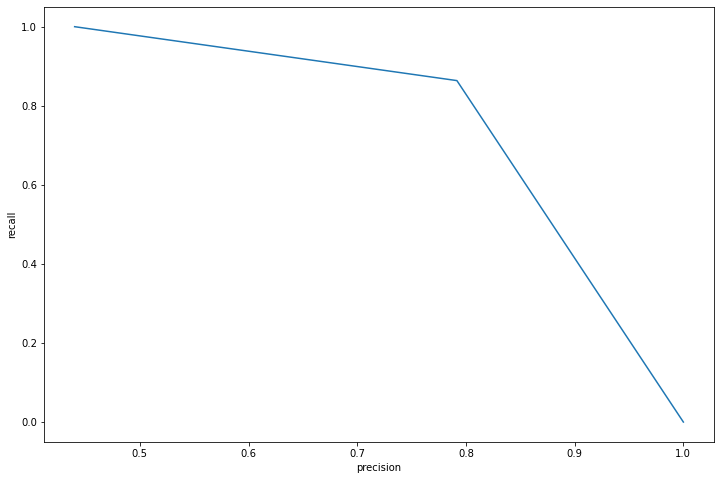

In [18]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_log_reg)

plt.figure(figsize=(12,8))
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

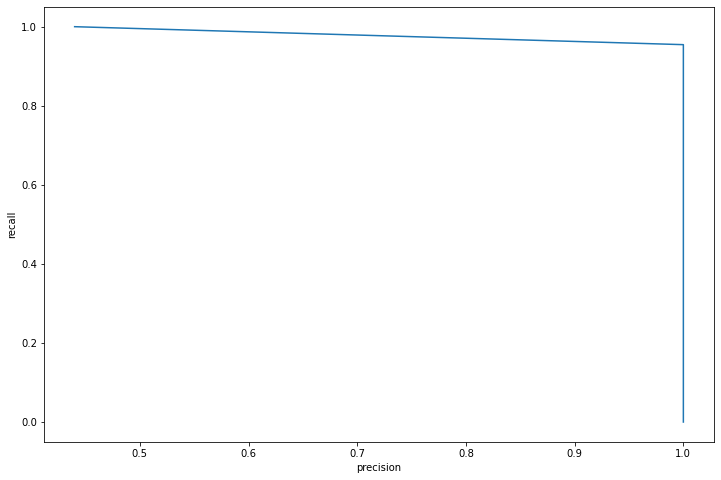

In [17]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_tree_clf)

plt.figure(figsize=(12,8))
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()

In [19]:
from mglearn.datasets import make_wave

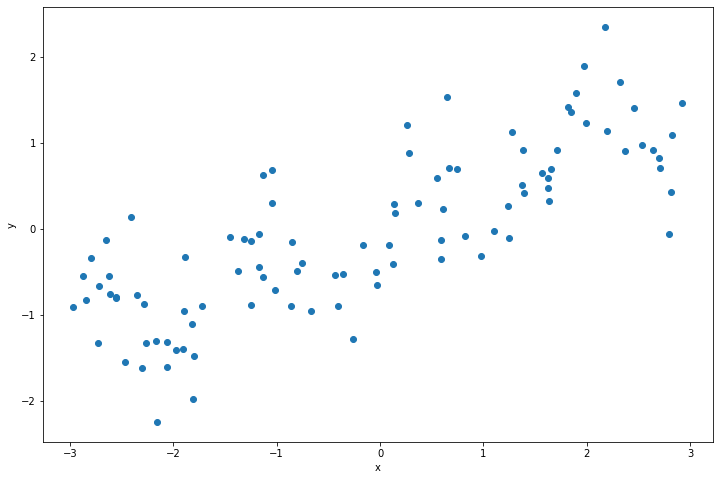

In [20]:
x, y = make_wave(n_samples=100)

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lin_reg = LinearRegression().fit(x_train, y_train)

In [23]:
print(lin_reg.score(x_test, y_test))

0.621210114749764


### MSE

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
y_pred = lin_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.3621150673476498

In [ ]:
rmse = np.sqrt